In [3]:
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
df = pd.read_json('/content/drive/MyDrive/Smoll data /final_stock_concat (1).json')
df['tradingDate'] = pd.to_datetime(df['tradingDate'])
df.head()

,ticker,open,high,low,close,volume,tradingDate
0,VMG,25000.0,25000.0,15000.0,19500.0,1211000.0,2009-09-30 00:00:00+00:00
1,VMG,20800.0,20800.0,20800.0,20800.0,200900.0,2009-10-01 00:00:00+00:00
2,VMG,22200.0,22200.0,21000.0,22100.0,658900.0,2009-10-02 00:00:00+00:00
3,VMG,23200.0,23200.0,20600.0,21100.0,117100.0,2009-10-05 00:00:00+00:00
4,VMG,19700.0,19700.0,19700.0,19700.0,69000.0,2009-10-06 00:00:00+00:00


In [6]:
SAM_df = df[df['ticker'] == 'SAM']
SAM_df

,ticker,open,high,low,close,volume,tradingDate
1901084,SAM,1424.0,1424.0,1424.0,1424.0,24700.0,2001-01-03 00:00:00+00:00
1901085,SAM,1449.0,1449.0,1449.0,1449.0,40300.0,2001-01-05 00:00:00+00:00
1901086,SAM,1474.0,1474.0,1474.0,1474.0,39500.0,2001-01-08 00:00:00+00:00
1901087,SAM,1504.0,1504.0,1504.0,1504.0,146200.0,2001-01-10 00:00:00+00:00
1901088,SAM,1533.0,1533.0,1533.0,1533.0,180600.0,2001-01-12 00:00:00+00:00
...,...,...,...,...,...,...,...
1906476,SAM,6250.0,6250.0,5800.0,6100.0,794670.0,2023-02-03 00:00:00+00:00
1906477,SAM,6200.0,6200.0,5900.0,6060.0,296065.0,2023-02-06 00:00:00+00:00
1906478,SAM,6100.0,6150.0,5940.0,5950.0,484438.0,2023-02-07 00:00:00+00:00
1906479,SAM,5990.0,6070.0,5920.0,5980.0,526384.0,2023-02-08 00:00:00+00:00


In [9]:
SAM_df.to_csv('/content/drive/MyDrive/Smoll data /SAM.csv')

In [27]:
len(df)

3698950

In [25]:
df.isna().sum()

ticker            0
open            102
high             94
low              94
close           122
volume         1555
tradingDate       0
high-low         94
dtype: int64

In [3]:
print(list(df['ticker'].unique()))

['VMG', 'TVS', 'ND2', 'TAW', 'TKC', 'MEC', 'GIC', 'XMD', 'QCG', 'TMT', 'DNN', 'TLP', 'TPB', 'LO5', 'DAT', 'HEC', 'YBC', 'CSV', 'OCB', 'VND', 'PJC', 'NTC', 'BSL', 'LMH', 'TVW', 'HDA', 'CTF', 'BAF', 'DNP', 'SHN', 'FGL', 'NAC', 'EBS', 'MEF', 'VE8', 'HPX', 'DTI', 'PTS', 'VXB', 'VNX', 'DOP', 'ACE', 'CJC', 'VTD', 'TMW', 'PVP', 'GGG', 'BPC', 'CPA', 'CSI', 'HDG', 'DP1', 'NHP', 'CEO', 'VDT', 'FHN', 'DVM', 'VMA', 'SCS', 'RCD', 'SZC', 'MTL', 'GAS', 'RCC', 'CLL', 'DHD', 'DP2', 'SD7', 'SHC', 'HHR', 'ABC', 'ABT', 'DVP', 'GLT', 'THB', 'DSV', 'FUESSV30', 'TOT', 'BAX', 'PXS', 'PSG', 'KDH', 'TOW', 'RGC', 'PID', 'LDP', 'VNF', 'TDG', 'HC3', 'VGS', 'PVR', 'QBS', 'AUM', 'TVA', 'FMC', 'PVY', 'REE', 'TTA', 'NFC', 'VLP', 'CNG', 'MWG', 'TNI', 'KHA', 'VGL', 'HND', 'G36', 'VCS', 'ILB', 'HJC', 'SAF', 'VNB', 'BMN', 'DCL', 'VNP', 'IJC', 'TTD', 'PVG', 'BLT', 'SPH', 'DC4', 'DLD', 'YEG', 'SUM', 'SAL', 'V21', 'HTT', 'SFG', 'TPH', 'CLG', 'STW', 'VNR', 'SDC', 'XDC', 'SPI', 'DSP', 'XHC', 'MCO', 'CNN', 'VIN', 'TTN', 'VPI', 

In [60]:
a = df['tradingDate'].agg(['min', 'max'])
print(a['min'], a['max'])

2001-01-03 00:00:00+00:00 2023-02-09 00:00:00+00:00


Many missing dates

In [53]:
from datetime import date, timedelta

missing_date_dict = {}

for ticker in tqdm(list(df['ticker'].unique())):
  recorded_date = df.loc[df['ticker'] == ticker, 'tradingDate']
  start_date = recorded_date.agg('min')
  end_date = recorded_date.agg('max')

  recorded_date = recorded_date.tolist()
  delta = end_date - start_date   # returns timedelta
  days = [start_date + timedelta(days=i) for i in range(delta.days + 1)]
  
  missing = 0
  for day in days:
    if day not in recorded_date:
      missing += 1
  missing_date_dict[ticker] = missing/len(recorded_date)
  # print('Missing ratio:', ticker, missing/len(recorded_date))
  # print(start_date, end_date)
  # print(days)
  # break

  5%|▍         | 80/1630 [01:19<25:34,  1.01it/s]


KeyboardInterrupt: ignored

### Histogram of high-low in day

In [4]:
df['high-low'] = df['high'] - df['low']

In [5]:
df['high-low'].describe()

count    3.698856e+06
mean     3.088497e+02
std      7.967397e+02
min     -5.362000e+03
25%      0.000000e+00
50%      5.000000e+01
75%      3.080000e+02
max      8.922900e+04
Name: high-low, dtype: float64

(array([3.675683e+06, 2.192200e+04, 9.540000e+02, 2.250000e+02,
        4.500000e+01, 9.000000e+00, 5.000000e+00, 5.000000e+00,
        6.000000e+00, 2.000000e+00]),
 array([-5362. ,  4097.1, 13556.2, 23015.3, 32474.4, 41933.5, 51392.6,
        60851.7, 70310.8, 79769.9, 89229. ]),
 <a list of 10 Patch objects>)

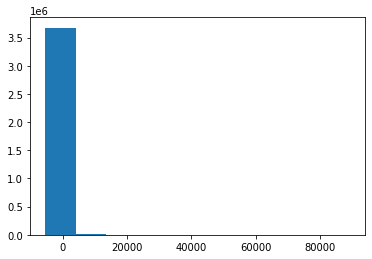

In [6]:
plt.hist(df['high-low'])

(array([2.000000e+00, 4.000000e+00, 5.900000e+01, 3.298513e+06,
        3.252850e+05, 4.840700e+04, 1.438200e+04, 5.637000e+03,
        2.617000e+03, 1.382000e+03]),
 array([-5362. , -3826.2, -2290.4,  -754.6,   781.2,  2317. ,  3852.8,
         5388.6,  6924.4,  8460.2,  9996. ]),
 <a list of 10 Patch objects>)

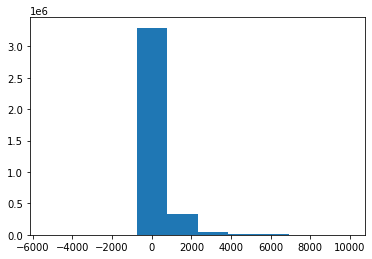

In [7]:
plt.hist(df.loc[df['high-low'] < 10000, 'high-low'])

In [8]:
df['high-low']

0          10000.0
1              0.0
2           1200.0
3           2600.0
4              0.0
            ...   
3698945      600.0
3698946      800.0
3698947      500.0
3698948     1100.0
3698949      700.0
Name: high-low, Length: 3698950, dtype: float64

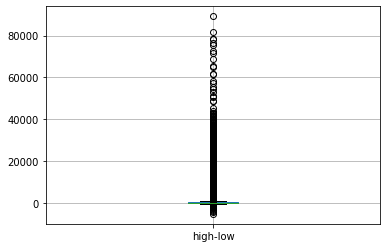

In [9]:
df.boxplot('high-low')

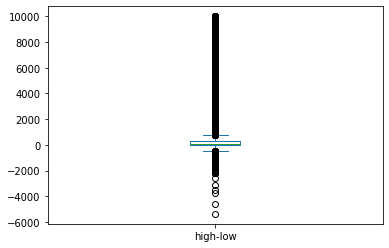

In [10]:
df.loc[df['high-low'] < 10000, 'high-low'].plot.box()

### Scatter plot of max volume and max opening of every stock

In [11]:
from collections import defaultdict
from tqdm import tqdm

max_vol_dict = defaultdict(lambda: 0)
max_open_dict = defaultdict(lambda: 0)
for row in tqdm(df.itertuples(), total=len(df)):
  ticker = row[1]
  volume = row[6]
  open = row[2]
  if max_vol_dict[ticker] < volume:
    max_vol_dict[ticker] = volume
  if max_open_dict[ticker] < open:
    max_open_dict[ticker] = open
 
print(max_vol_dict)
print(max_open_dict)


100%|██████████| 3698950/3698950 [00:20<00:00, 177491.05it/s]

defaultdict(<function <lambda> at 0x7f5d81534430>, {'VMG': 1928800.0, 'TVS': 1278300.0, 'ND2': 661800.0, 'TAW': 33914.0, 'TKC': 1036400.0, 'MEC': 782243.0, 'GIC': 313500.0, 'XMD': 199731.0, 'QCG': 7856200.0, 'TMT': 425210.0, 'DNN': 1200.0, 'TLP': 9959800.0, 'TPB': 20800040.0, 'LO5': 279900.0, 'DAT': 369300.0, 'HEC': 24100.0, 'YBC': 1351401.0, 'CSV': 2880300.0, 'OCB': 18373400.0, 'VND': 65510692.0, 'PJC': 74700.0, 'NTC': 404651.0, 'BSL': 510300.0, 'LMH': 10906446.0, 'TVW': 100000.0, 'HDA': 2135431.0, 'CTF': 1679600.0, 'BAF': 17419300.0, 'DNP': 1647100.0, 'SHN': 10939300.0, 'FGL': 100.0, 'NAC': 61500.0, 'EBS': 1443900.0, 'MEF': 32300.0, 'VE8': 74900.0, 'HPX': 165260319.0, 'DTI': 2175809.0, 'PTS': 322300.0, 'VXB': 254230.0, 'VNX': 31100.0, 'DOP': 25000.0, 'ACE': 66752.0, 'CJC': 415100.0, 'VTD': 1146935.0, 'TMW': 48800.0, 'PVP': 3911206.0, 'GGG': 1955432.0, 'BPC': 189000.0, 'CPA': 52700.0, 'CSI': 168800.0, 'HDG': 6368644.0, 'DP1': 87050.0, 'NHP': 5898111.0, 'CEO': 26895274.0, 'VDT': 32700.

In [12]:
max_val_dict = defaultdict(list)

for ticker, vol in max_vol_dict.items():
  max_val_dict['ticker'].append(ticker)
  max_val_dict['max_vol'].append(vol)
  max_val_dict['max_open'].append(max_open_dict[ticker])

max_df = pd.DataFrame(max_val_dict)
max_df.head()

,ticker,max_vol,max_open
0,VMG,1928800.0,25000.0
1,TVS,1278300.0,69400.0
2,ND2,661800.0,37756.0
3,TAW,33914.0,42457.0
4,TKC,1036400.0,22657.0


Text(0.5, 0, 'Max opening')

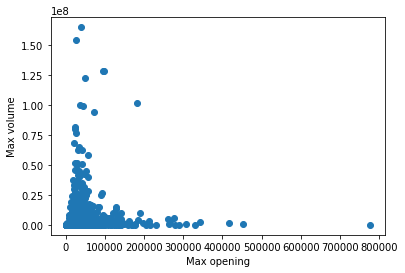

In [13]:
plt.scatter(max_df['max_open'], max_df['max_vol'])
plt.ylabel('Max volume')
plt.xlabel('Max opening')

In [14]:
sorted_max_df = max_df.sort_values(by=['max_vol'], ascending=False)
sorted_max_df.head()

,ticker,max_vol,max_open
35,HPX,165260319.0,39950.0
1529,FLC,154958000.0,26562.0
637,NVL,128536256.0,93975.0
729,DIG,128443910.0,97544.0
1552,GEX,122574700.0,48557.0


MBS trend

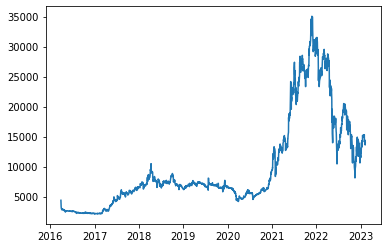

In [20]:
plt.plot(df.loc[df['ticker'] == 'MBS', 'tradingDate'], df.loc[df['ticker'] == 'MBS', 'open'])

### 2008 financial crisis

Only take stocks that we do have data in this period

In [15]:
crisis_df = df[(df['tradingDate'] > '2007-8-1') & (df['tradingDate'] < '2008-12-31')]

max_vol_dict_2008 = defaultdict(lambda: 0)
max_open_dict_2008 = defaultdict(lambda: 0)
for row in tqdm(crisis_df.itertuples(), total=len(crisis_df)):
  ticker = row[1]
  volume = row[6]
  open = row[2]
  if max_vol_dict_2008[ticker] < volume:
    max_vol_dict_2008[ticker] = volume
  if max_open_dict_2008[ticker] < open:
    max_open_dict_2008[ticker] = open
 
max_val_dict_2008 = defaultdict(list)
for ticker, vol in max_vol_dict_2008.items():
  max_val_dict_2008['ticker'].append(ticker)
  max_val_dict_2008['max_vol'].append(vol)
  max_val_dict_2008['max_open'].append(max_open_dict[ticker])

max_df_2008 = pd.DataFrame(max_val_dict_2008).sort_values(by=['max_vol'], ascending=False)
max_df_2008.head()

100%|██████████| 74117/74117 [00:00<00:00, 246706.34it/s]


,ticker,max_vol,max_open
172,STB,7559350.0,36000.0
176,SSI,7000970.0,51313.0
156,DPM,4694090.0,68806.0
42,VTO,3237880.0,22663.0
34,ACB,3215400.0,30400.0


All stock prices decreased in this period

  0%|          | 1/276 [00:00<02:43,  1.68it/s]

['STB']


  1%|          | 2/276 [00:01<02:41,  1.70it/s]

['STB', 'SSI']


  1%|          | 3/276 [00:01<02:40,  1.70it/s]

['STB', 'SSI', 'DPM']


  1%|▏         | 4/276 [00:02<02:40,  1.69it/s]

['STB', 'SSI', 'DPM', 'VTO']


  1%|▏         | 4/276 [00:02<03:19,  1.36it/s]

['STB', 'SSI', 'DPM', 'VTO', 'ACB']


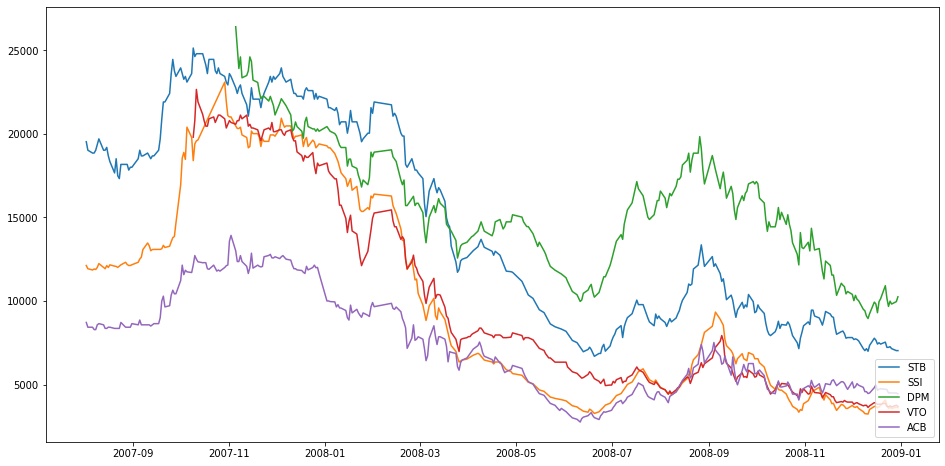

In [16]:
plt.figure(figsize=(16,8))

stock_count = 0
tickers = []
for ticker in tqdm(max_df_2008.ticker):
  ticker_2008 = df.loc[(df['ticker'] == ticker) & (df['tradingDate'] > '2007-8-1') & (df['tradingDate'] < '2008-12-31')]
  if len(ticker_2008) > 0:
    stock_count += 1
    tickers.append(ticker)
    print(tickers)
    plt.plot(ticker_2008['tradingDate'], ticker_2008['open'])
    if stock_count == 5:
      break
plt.legend(tickers, loc="lower right")
    # break

### COVID pandemic

Similarly, only take stocks that we have data in this period

In [17]:
covid_df = df[(df['tradingDate'] > '2020-1-1') & (df['tradingDate'] < '2021-6-30')]

max_vol_dict_covid = defaultdict(lambda: 0)
max_open_dict_covid = defaultdict(lambda: 0)
for row in tqdm(covid_df.itertuples(), total=len(covid_df)):
  ticker = row[1]
  volume = row[6]
  open = row[2]
  if max_vol_dict_covid[ticker] < volume:
    max_vol_dict_covid[ticker] = volume
  if max_open_dict_covid[ticker] < open:
    max_open_dict_covid[ticker] = open
 
max_val_dict_covid = defaultdict(list)
for ticker, vol in max_vol_dict_covid.items():
  max_val_dict_covid['ticker'].append(ticker)
  max_val_dict_covid['max_vol'].append(vol)
  max_val_dict_covid['max_open'].append(max_open_dict[ticker])

max_df_covid = pd.DataFrame(max_val_dict_covid).sort_values(by=['max_vol'], ascending=False)
max_df_covid.head()

100%|██████████| 567306/567306 [00:02<00:00, 271950.17it/s]


,ticker,max_vol,max_open
458,ROS,101769700.0,180826.0
1036,STB,99978500.0,36000.0
891,HQC,81739370.0,23930.0
160,SHB,79872908.0,23491.0
746,VPB,76583400.0,26855.0


Stock prices did not change much in earlier periods and started to rise in the end of the pandemic

  0%|          | 1/1568 [00:00<15:39,  1.67it/s]

['ROS']


  0%|          | 2/1568 [00:01<15:43,  1.66it/s]

['ROS', 'STB']


  0%|          | 3/1568 [00:02<19:26,  1.34it/s]

['ROS', 'STB', 'HQC']


  0%|          | 4/1568 [00:03<21:22,  1.22it/s]

['ROS', 'STB', 'HQC', 'SHB']


  0%|          | 4/1568 [00:03<25:23,  1.03it/s]

['ROS', 'STB', 'HQC', 'SHB', 'VPB']


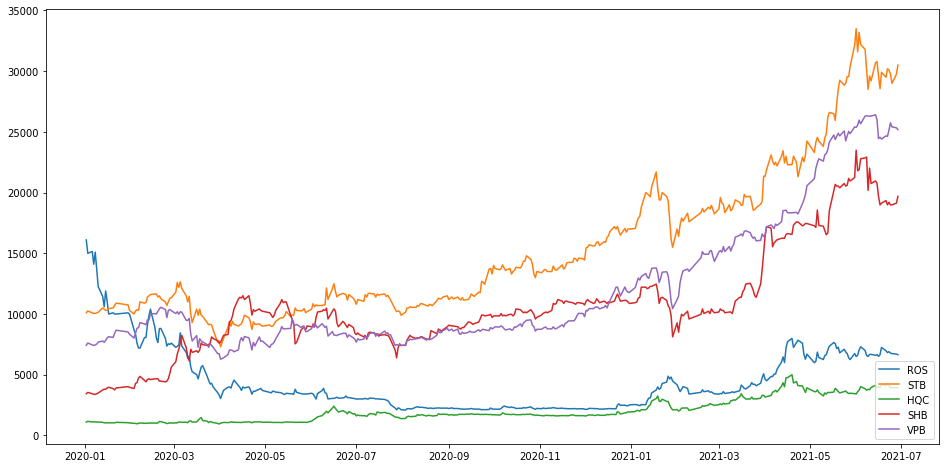

In [18]:
plt.figure(figsize=(16,8))

stock_count = 0
tickers = []
for ticker in tqdm(max_df_covid.ticker):
  ticker_covid = df.loc[(df['ticker'] == ticker) & (df['tradingDate'] > '2020-1-1') & (df['tradingDate'] < '2021-6-30')]
  if len(ticker_covid) > 0:
    stock_count += 1
    tickers.append(ticker)
    print(tickers)
    plt.plot(ticker_covid['tradingDate'], ticker_covid['open'])
    if stock_count == 5:
      break
plt.legend(tickers, loc="lower right")
    # break

### Some model bruh

In [70]:
from datetime import date, timedelta

recent_df = df[(df['tradingDate'] > '2022-9-1') & (df['tradingDate'] < '2023-1-1')]
missing_date_dict = {}

for ticker in tqdm(list(recent_df['ticker'].unique())):
  recorded_date = recent_df.loc[recent_df['ticker'] == ticker, 'tradingDate']
  start_date = recorded_date.agg('min')
  end_date = recorded_date.agg('max')

  recorded_date = recorded_date.tolist()
  delta = end_date - start_date   # returns timedelta
  days = [start_date + timedelta(days=i) for i in range(delta.days + 1)]
  
  missing = 0
  for day in days:
    if day not in recorded_date:
      missing += 1
  missing_date_dict[ticker] = missing/len(recorded_date)


100%|██████████| 1612/1612 [00:43<00:00, 36.89it/s]


In [71]:
missing_date_dict

{'VMG': 0.3764705882352941,
 'TVS': 0.3764705882352941,
 'ND2': 0.3764705882352941,
 'TAW': 0.3764705882352941,
 'TKC': 0.3764705882352941,
 'MEC': 0.3764705882352941,
 'GIC': 0.3764705882352941,
 'XMD': 0.3764705882352941,
 'QCG': 0.3764705882352941,
 'TMT': 0.3764705882352941,
 'DNN': 0.3764705882352941,
 'TLP': 0.3764705882352941,
 'TPB': 0.3764705882352941,
 'LO5': 0.3764705882352941,
 'DAT': 0.3764705882352941,
 'HEC': 0.3764705882352941,
 'YBC': 0.3764705882352941,
 'CSV': 0.3764705882352941,
 'OCB': 0.3764705882352941,
 'VND': 0.3764705882352941,
 'PJC': 0.3764705882352941,
 'NTC': 0.3764705882352941,
 'BSL': 0.3764705882352941,
 'LMH': 0.3764705882352941,
 'TVW': 0.3764705882352941,
 'HDA': 0.3764705882352941,
 'CTF': 0.3764705882352941,
 'BAF': 0.3764705882352941,
 'DNP': 0.3764705882352941,
 'SHN': 0.3764705882352941,
 'FGL': 0.3764705882352941,
 'NAC': 0.3764705882352941,
 'EBS': 0.3764705882352941,
 'MEF': 0.3764705882352941,
 'VE8': 0.3764705882352941,
 'HPX': 0.3764705882

In [72]:
df[(df['ticker'] == 'HAC') & (df['tradingDate'] > '2022-9-1') & (df['tradingDate'] < '2023-1-1')]

,ticker,open,high,low,close,volume,tradingDate,high-low
2115025,HAC,8500.0,8500.0,8500.0,8500.0,1000.0,2022-09-05 00:00:00+00:00,0.0
2115026,HAC,8500.0,8500.0,8500.0,8500.0,0.0,2022-09-06 00:00:00+00:00,0.0
2115027,HAC,7600.0,7600.0,7600.0,7600.0,100.0,2022-09-07 00:00:00+00:00,0.0
2115028,HAC,8000.0,8100.0,7600.0,7800.0,7700.0,2022-09-08 00:00:00+00:00,500.0
2115029,HAC,8000.0,8100.0,8000.0,8000.0,4836.0,2022-09-09 00:00:00+00:00,100.0
...,...,...,...,...,...,...,...,...
2115105,HAC,5800.0,5800.0,5800.0,5800.0,232.0,2022-12-26 00:00:00+00:00,0.0
2115106,HAC,5400.0,5400.0,5400.0,5400.0,100.0,2022-12-27 00:00:00+00:00,0.0
2115107,HAC,4700.0,5700.0,4600.0,5300.0,4511.0,2022-12-28 00:00:00+00:00,1100.0
2115108,HAC,5400.0,5400.0,5400.0,5400.0,400.0,2022-12-29 00:00:00+00:00,0.0


In [68]:
df[(df['ticker'] == 'SAM') & (df['tradingDate'] > '2022-9-30')]

,ticker,open,high,low,close,volume,tradingDate,high-low
1906393,SAM,9807.0,9807.0,9173.0,9327.0,1719169.0,2022-10-03 00:00:00+00:00,634.0
1906394,SAM,9375.0,9663.0,8846.0,9663.0,1508725.0,2022-10-04 00:00:00+00:00,817.0
1906395,SAM,9615.0,9855.0,9557.0,9711.0,901663.0,2022-10-05 00:00:00+00:00,298.0
1906396,SAM,9615.0,9807.0,9250.0,9471.0,818150.0,2022-10-06 00:00:00+00:00,557.0
1906397,SAM,9134.0,9615.0,8817.0,9615.0,2207906.0,2022-10-07 00:00:00+00:00,798.0
...,...,...,...,...,...,...,...,...
1906476,SAM,6250.0,6250.0,5800.0,6100.0,794670.0,2023-02-03 00:00:00+00:00,450.0
1906477,SAM,6200.0,6200.0,5900.0,6060.0,296065.0,2023-02-06 00:00:00+00:00,300.0
1906478,SAM,6100.0,6150.0,5940.0,5950.0,484438.0,2023-02-07 00:00:00+00:00,210.0
1906479,SAM,5990.0,6070.0,5920.0,5980.0,526384.0,2023-02-08 00:00:00+00:00,150.0


In [66]:
df[df['ticker'] == 'SAM'].sort_values()

,ticker,open,high,low,close,volume,tradingDate,high-low
1901084,SAM,1424.0,1424.0,1424.0,1424.0,24700.0,2001-01-03 00:00:00+00:00,0.0
1901085,SAM,1449.0,1449.0,1449.0,1449.0,40300.0,2001-01-05 00:00:00+00:00,0.0
1901086,SAM,1474.0,1474.0,1474.0,1474.0,39500.0,2001-01-08 00:00:00+00:00,0.0
1901087,SAM,1504.0,1504.0,1504.0,1504.0,146200.0,2001-01-10 00:00:00+00:00,0.0
1901088,SAM,1533.0,1533.0,1533.0,1533.0,180600.0,2001-01-12 00:00:00+00:00,0.0
...,...,...,...,...,...,...,...,...
1906476,SAM,6250.0,6250.0,5800.0,6100.0,794670.0,2023-02-03 00:00:00+00:00,450.0
1906477,SAM,6200.0,6200.0,5900.0,6060.0,296065.0,2023-02-06 00:00:00+00:00,300.0
1906478,SAM,6100.0,6150.0,5940.0,5950.0,484438.0,2023-02-07 00:00:00+00:00,210.0
1906479,SAM,5990.0,6070.0,5920.0,5980.0,526384.0,2023-02-08 00:00:00+00:00,150.0


In [67]:
missing_date_dict['SAM']

0.4772727272727273

In [84]:
!pwd

/content


In [1]:
pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:

import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder \
                    .appName('SparkByExamples.com') \
                    .getOrCreate()
